# Figure 3

Main four-panel figure

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import scipy.stats as stats

%matplotlib inline


In [13]:
sns.set_theme(style="white", font_scale=1.6)

Load data

In [3]:
data_dir = "output/sys_disc_final.csv"
comm_info_dir = "data/one2one/one2one_comm_cleaned.zip"
game_info_dir = "data/one2one/one2one_game_info.json"

output_dir = "figs"

In [4]:
df = pd.read_csv(data_dir)
df_comm = pd.read_csv(comm_info_dir)

with open(game_info_dir, 'r') as f: 
    game_info = json.load(f)

Add discreteness normalized score

In [5]:
df['discreteness_val'] = 1 - (df['n_clusters'] / df['n_clusters'].max())

## Stats

Correlation between learning score and communication score

In [5]:
nas = df['learn_score_new'].isna()

r, p = stats.pearsonr(df['learn_score_new'][~nas], df['partner_comm_score'][~nas])
print(f"r={r}, p={p}")

r=0.4115603774988657, p=0.0036583297380005323


T test for communication score above chance

In [6]:
speakers = pd.unique(df_comm['speakerid']).tolist()

rs = []
for speaker in speakers:
    r, _ = stats.pearsonr(df_comm[df_comm['speakerid'] == speaker]['round'], df_comm[df_comm['speakerid'] == speaker]['score'])
    rs.append(r)
    
tstat, p = stats.ttest_1samp(rs, 0)
print(f"t={tstat} p={p}")

t=5.306658788375412 p=2.6813027262982924e-06


T test for communication score increase over rounds

In [7]:
# Moshe did this

Median number of clusters

In [8]:
df['n_clusters'].median()

7.0

Value counts

In [9]:
df['category'].value_counts()

D+S+    35
D+S-     7
D-S-     6
D-S+     2
Name: category, dtype: int64

Mean of $\texttt{D+S+}$ case

In [10]:
df[df['category'] == 'D+S+']['partner_comm_score'].mean()

0.707268944873841

Correlation between systematicity and performance

In [11]:
r, p = stats.pearsonr(df['colorsignal_corr'], df['partner_comm_score'])
print(f"r={r}, p={p}")

r=0.7033406469878617, p=1.2270027890095553e-08


## Make figure

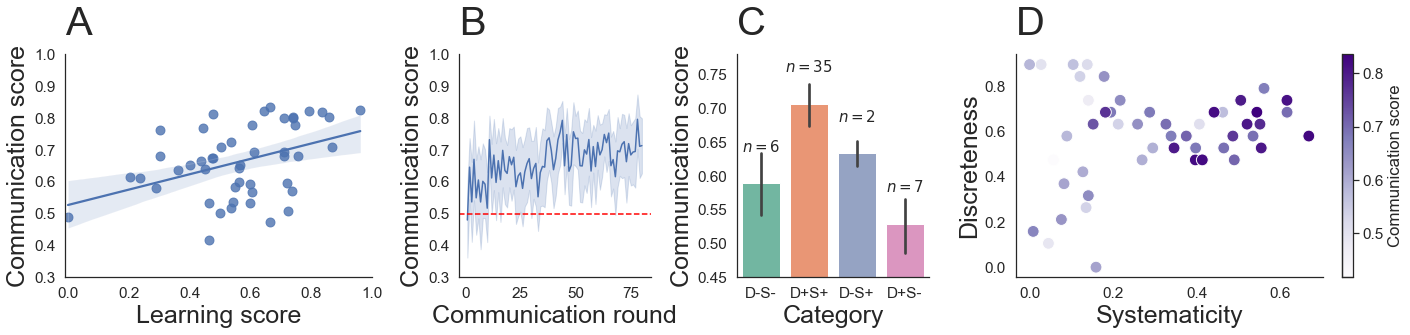

In [12]:
fsize = 25
titlefsize = 40

f, axs = plt.subplots(1, 4, figsize=(20, 5), gridspec_kw={'width_ratios': [1.6, 1, 1, 2]})

# A: relationship between learning and communication scatterplot
sns.regplot(ax=axs[0], x="learn_score_new", y="partner_comm_score", data=df, scatter_kws=dict(s=80))
axs[0].set_xlabel("Learning score", fontsize=fsize)
axs[0].set_ylabel("Communication score", fontsize=fsize)
axs[0].set(xlim=(-0.01, 1), ylim=(0.3, 1))
axs[0].set_title("A", loc="left", fontsize=titlefsize, y=1.06)

# B: relationship between round and communication score
sns.lineplot(ax=axs[1], data=df_comm, x="round", y="score")
axs[1].set_xlabel("Communication round", fontsize=fsize)
axs[1].set_ylabel("Communication score", fontsize=fsize)
axs[1].axhline(0.5, ls='--', c='red')
axs[1].set_ylim((.3, 1))
axs[1].set_title("B", loc="left", fontsize=titlefsize, y=1.06)

# C: barplots
plots = sns.barplot(ax=axs[2], x="category", y="partner_comm_score", data=df, palette="Set2")
axs[2].set_ylim((0.45, 0.78))
axs[2].set_xlabel("Category", fontsize=fsize)
axs[2].set_ylabel("Communication score", fontsize=fsize)
axs[2].set_title("C", loc="left", fontsize=titlefsize, y=1.06)

count_text = ['$n=6$', '$n=35$', '$n=2$', '$n=7$']

for i, bar in enumerate(plots.patches):
   
    plots.annotate(count_text[i],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.0425), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


# D: systematicity heatmap
sns.scatterplot(ax=axs[3], x="colorsignal_corr", y="discreteness_val", hue="partner_comm_score", s=140, legend=False, data=df, palette="Purples")
axs[3].set_xlabel("Systematicity", fontsize=fsize)
axs[3].set_ylabel("Discreteness", fontsize=fsize)
axs[3].set_title("D", loc="left", fontsize=titlefsize, y=1.06)


norm = plt.Normalize(df['partner_comm_score'].min(), df['partner_comm_score'].max())
sm = plt.cm.ScalarMappable(norm=norm, cmap="Purples")
sm.set_array([])
axs[3].figure.colorbar(sm, label="Communication score")

plt.tight_layout()
sns.despine()

# plt.savefig(os.path.join(output_dir, "main_4panel_fig.pdf"))
# plt.savefig(os.path.join(output_dir, "main_4panel_fig.png"))

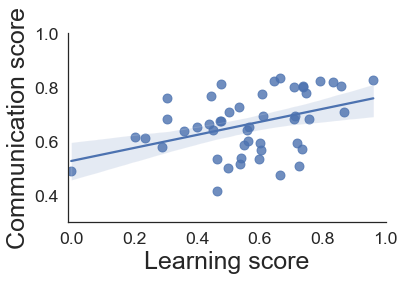

In [42]:
# Make individual plots and make plots bigger, save as pdf 
fsize = 25 
titlefsize = 40

f, ax = plt.subplots(figsize=(6, 4))

# A: relationship between learning and communication scatterplot
sns.regplot(ax=ax, x="learn_score_new", y="partner_comm_score", data=df, scatter_kws=dict(s=80))
ax.set_xlabel("Learning score", fontsize=fsize)
ax.set_ylabel("Communication score", fontsize=fsize)
ax.set(xlim=(-0.01, 1), ylim=(0.3, 1))
plt.tight_layout()
sns.despine()

plt.savefig(os.path.join(output_dir, "learning_comm.pdf"))


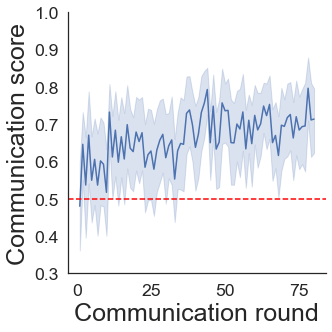

In [43]:
# B: relationship between round and communication score
f, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(ax=ax, data=df_comm, x="round", y="score")
ax.set_xlabel("Communication round", fontsize=fsize)
ax.set_ylabel("Communication score", fontsize=fsize)
ax.axhline(0.5, ls='--', c='red')
ax.set_ylim((.3, 1))
plt.tight_layout()
sns.despine()
plt.savefig(os.path.join(output_dir, "comm_increase.pdf"))

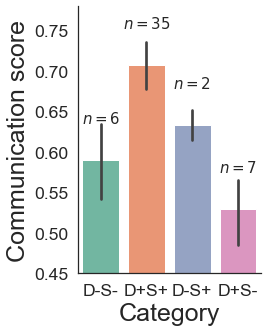

In [47]:
# C: barplots
f, ax = plt.subplots(figsize=(4.1, 5))
plots = sns.barplot(ax=ax, x="category", y="partner_comm_score", data=df, palette="Set2")
ax.set_ylim((0.45, 0.78))
ax.set_xlabel("Category", fontsize=fsize)
ax.set_ylabel("Communication score", fontsize=fsize)

count_text = ['$n=6$', '$n=35$', '$n=2$', '$n=7$']

for i, bar in enumerate(plots.patches):
   
    plots.annotate(count_text[i],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.0425), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.tight_layout()
sns.despine()

plt.savefig(os.path.join(output_dir, "categories.pdf"))

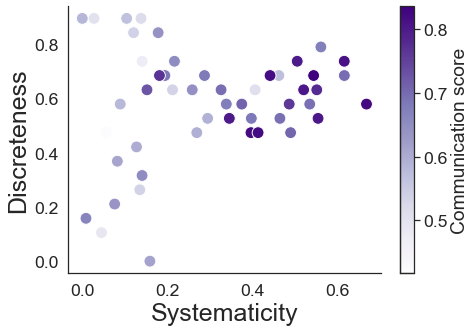

In [45]:
# D: systematicity heatmap
f, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(ax=ax, x="colorsignal_corr", y="discreteness_val", hue="partner_comm_score", s=140, legend=False, data=df, palette="Purples")
ax.set_xlabel("Systematicity", fontsize=fsize)
ax.set_ylabel("Discreteness", fontsize=fsize)

norm = plt.Normalize(df['partner_comm_score'].min(), df['partner_comm_score'].max())
sm = plt.cm.ScalarMappable(norm=norm, cmap="Purples")
sm.set_array([])
ax.figure.colorbar(sm, label="Communication score")

plt.tight_layout()
sns.despine()

plt.savefig(os.path.join(output_dir, "syst_disc_perf.pdf"))
# plt.savefig(os.path.join(output_dir, "main_4panel_fig.pdf"))
# plt.savefig(os.path.join(output_dir, "main_4panel_fig.png"))